Robustní metody
-----------------

problém odlehlých hodnot  

M-odhady - pomocí vhodné váhové funkce je menší citlivost na vychýlené body než u nejm. čtverců ($d^2$)

minimalizujeme $\sum g(x_i,\theta)$, ve většině případů lze derivovat podle odhadu $\theta$: $\psi(x_i,\theta)=\partial g(x_i,\theta)/\partial \theta$ a váha se vyjádří jako

$$w(r_i)=\frac{\psi(r_i)}{r_i}$$ kde $r_i=x_i-\theta$

[zdroj pro M-funkce](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/11/RR-2676.pdf)


![M-formule](https://is.muni.cz/auth/el/1431/podzim2018/FX003/um/extern/mfunc-form.png)

[M-plot](https://is.muni.cz/auth/el/1431/podzim2018/FX003/um/extern/mfunc-plot.png "grafy")
 

In [3]:
%matplotlib inline
from matplotlib import pyplot as pl
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]
#mpl.use("pgf")
#mpl.use('GTK')
from numpy import r_,random

vytvoříme sadu dat s normálně rozdělenou nejistotou a příměsí **rovnoměrně rozdělených** vychýlených bodů  
"správná" funkce je lineární se sklonem `slp=-0.6`

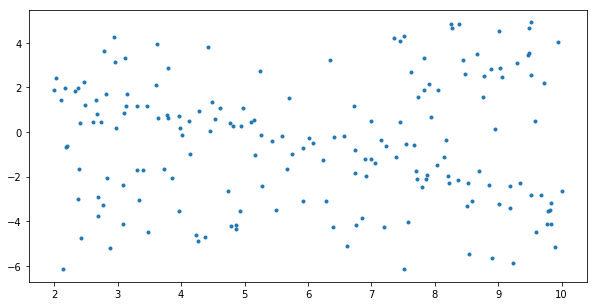

In [14]:
import numpy as np

frac=2.6
slp=-.6
x=r_[2:10:50j]
y=x*slp+random.normal(3,0.4,size=x.shape) #sigma=0.4
x2=np.concatenate([x,random.uniform(2,10,size=int(frac*x.size))])
y2=np.concatenate([y,random.uniform(y.min()-3,y.max()+3,size=int(frac*x.size))])
pl.plot(x2,y2,'.')

In [10]:
c=2 #tuning constant
gfunw=lambda z:c**2/2*(1-np.exp(-z**2/c**2)) #welsh
gfunh=lambda z:(abs(z)<c)*z**2/2+(abs(z)>=c)*(abs(c*z)-c**2/2) #huber
gfun=gfunh
#gfun=lambda z:abs(z)
wei=lambda p:gfun(y2-p[1]-p[0]*x2).sum()
from scipy import optimize as op
eslp=-0.5 # uvodni odhad sklonu
op.fmin(wei,[eslp,y2.mean()-eslp*x2.mean()])

Optimization terminated successfully.
         Current function value: 359.456525
         Iterations: 38
         Function evaluations: 73


array([-0.36046753,  2.22814956])

In [6]:
#klasicke nejmensi ctverce
gfun=lambda z:z**2/2
wei=lambda p:gfun(y2-p[1]-p[0]*x2).sum()
op.fmin(wei,[eslp,y2.mean()-eslp*x2.mean()])

Optimization terminated successfully.
         Current function value: 480.614814
         Iterations: 38
         Function evaluations: 71


array([-0.19950445,  1.33355382])

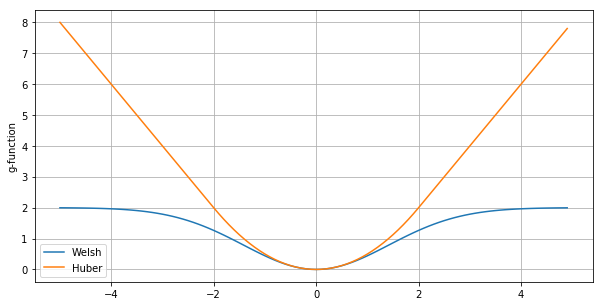

In [9]:
xn=r_[-5:5:0.1]
pl.plot(xn,gfunw(xn))
pl.plot(xn,gfunh(xn))
pl.legend(["Welsh","Huber"])
np.polyfit(x2,y2,1)
pl.ylabel("g-function")
pl.grid()

In [11]:
# jina volba tuning constant
c=1.
op.fmin(wei,[-0.5,y2.mean()-0.5*x2.mean()])

Optimization terminated successfully.
         Current function value: 220.400542
         Iterations: 53
         Function evaluations: 103


array([-0.45024374,  2.52862874])

### test 1: ruzná míra příměsi chybných bodů

In [16]:
# nejmensi ctverce
gfunc=lambda z:z**2/2
gfun=gfunc
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
rep=[]
for j in range(len(y),len(y2),10):
    x3,y3=x2[:j],y2[:j]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
arep=np.array(rep)
arep

array([[-6.08959666e-01,  3.13757895e+00,  3.92637486e+00],
       [-3.13869244e-01,  1.57777459e+00,  8.02712073e+01],
       [-2.64308623e-01,  1.49099130e+00,  1.28039101e+02],
       [-1.42113427e-01,  6.46775558e-01,  1.82791051e+02],
       [-9.89020838e-02,  4.24855483e-01,  2.37582129e+02],
       [-1.10087759e-01,  2.33485006e-01,  2.78530494e+02],
       [-9.31788691e-02,  1.79376265e-01,  3.08444432e+02],
       [-5.09951125e-02, -1.25000810e-01,  3.85642436e+02],
       [-3.59898911e-02, -1.69279406e-01,  4.30772941e+02],
       [-4.95478082e-02, -1.13680681e-01,  4.93414698e+02],
       [-3.58196399e-02, -2.28841317e-01,  5.35389812e+02],
       [-3.26899715e-02, -2.74270193e-01,  5.80518045e+02],
       [-2.35084188e-02, -3.65981566e-01,  6.26344737e+02]])

In [75]:
# median
gfund=lambda z:abs(z)
gfun=gfund
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
rep=[]
for j in range(len(y),len(y2),10):
    x3,y3=x2[:j],y2[:j]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
arepd=np.array(rep)
arepd

array([[ -0.64126009,   3.30361015,  15.22644796],
       [ -0.5762716 ,   3.01168627,  52.92207225],
       [ -0.56006586,   2.93240097,  79.23455588],
       [ -0.54906221,   2.85299144, 114.07496512],
       [ -0.50611256,   2.5898306 , 144.34935711],
       [ -0.52489502,   2.6112838 , 167.41217633],
       [ -0.49758764,   2.4673662 , 193.04907322],
       [ -0.48970335,   2.42586538, 232.86535561],
       [ -0.47130052,   2.32895698, 261.32180231],
       [ -0.48039263,   2.38306839, 290.42827521],
       [ -0.46391569,   2.29007158, 317.60531327],
       [ -0.46391751,   2.29007742, 342.3073334 ],
       [ -0.43087284,   1.98486189, 371.31153049]])

In [31]:
# Geman-McClure - vychazi podobne jako Welsch
gfunm=lambda z:z**2/2/(1+z**2)
gfun=gfunm
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
rep=[]
for j in range(len(y),len(y2),10):
    x3,y3=x2[:j],y2[:j]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
arepm=np.array(rep)
arepm

array([[-0.61821466,  3.19804894,  2.69353252],
       [-0.60932795,  3.13852253,  6.9363462 ],
       [-0.61579794,  3.14866671,  9.90087564],
       [-0.6173967 ,  3.14778772, 13.74806474],
       [-0.62736467,  3.20777987, 17.22631185],
       [-0.62951194,  3.19870398, 20.6245352 ],
       [-0.62867645,  3.17827894, 24.6005521 ],
       [-0.62592605,  3.15080313, 28.85026654],
       [-0.62246403,  3.11127214, 32.47586517],
       [-0.63460864,  3.18949332, 35.81388724],
       [-0.62713478,  3.16079941, 39.68634182],
       [-0.62915309,  3.17963365, 42.63994786],
       [-0.64282686,  3.22902577, 46.23522185]])

In [17]:
#Huberova funkce
gfun=gfunh
rep=[]
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
for j in range(len(y),len(y2),10):
    x3,y3=x2[:j],y2[:j]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
areph=np.array(rep)
areph

array([[ -0.61056797,   3.15013751,   3.9161817 ],
       [ -0.52037462,   2.66125443,  35.59781431],
       [ -0.50733224,   2.62327189,  57.42015026],
       [ -0.45446402,   2.3076043 ,  86.63191423],
       [ -0.44222583,   2.24473079, 111.49880387],
       [ -0.44640274,   2.12914138, 129.81680715],
       [ -0.42165324,   1.99679521, 149.76149983],
       [ -0.39558253,   1.83485728, 184.24664415],
       [ -0.37381648,   1.73165223, 207.50546061],
       [ -0.39448041,   1.8367487 , 232.45862459],
       [ -0.36120213,   1.63901475, 253.820715  ],
       [ -0.35096498,   1.57438101, 273.89172845],
       [ -0.34791731,   1.4950359 , 297.62150897]])

In [18]:
#Welshova funkce
gfun=gfunw
rep=[]
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
for j in range(len(y),len(y2),10):
    x3,y3=x2[:j],y2[:j]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
arepw=np.array(rep)
arepw

array([[-0.6169335 ,  3.19343961,  3.08075253],
       [-0.60952179,  3.13900462,  7.74977683],
       [-0.61894493,  3.16797654, 10.96860818],
       [-0.62153829,  3.17221963, 15.04848392],
       [-0.63120374,  3.22985839, 18.89029532],
       [-0.63254527,  3.21984346, 22.84942969],
       [-0.63182213,  3.19580913, 27.37731856],
       [-0.62835212,  3.16571914, 31.93741664],
       [-0.62556002,  3.12899429, 35.90740688],
       [-0.63760218,  3.20548728, 39.65984109],
       [-0.63001351,  3.17939272, 43.97153902],
       [-0.63233994,  3.19534952, 47.19884854],
       [-0.64757426,  3.25313727, 51.16989575]])

(-0.1, 0.8)

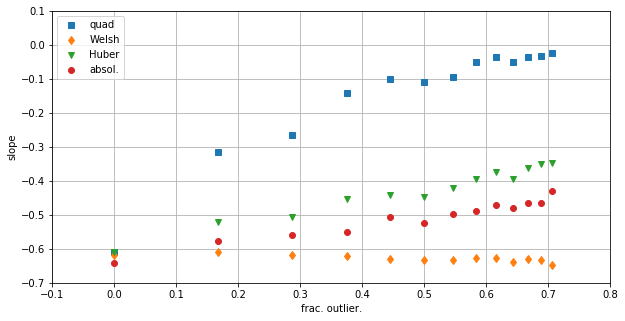

In [77]:
#vysledky testu pro sklon
ix=np.arange(len(y),len(y2),10.)/len(y)
ix=1-1/ix
pl.plot(ix,arep[:,0],'s')
pl.plot(ix,arepw[:,0],'d')
pl.plot(ix,areph[:,0],'v')
pl.plot(ix,arepd[:,0],'o')
pl.legend(["quad","Welsh","Huber","absol."],loc=2)
pl.ylabel("slope")
pl.ylim(-0.7,0.1)
pl.grid()
pl.xlabel("frac. outlier.")
pl.xlim(-0.1,0.8)

(-0.1, 0.8)

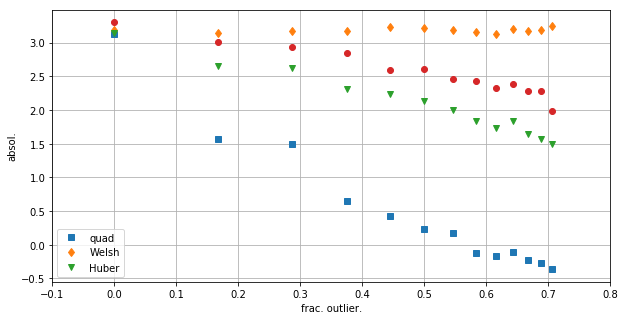

In [113]:
pl.plot(ix,arep[:,1],'s')
pl.plot(ix,arepw[:,1],'d')
pl.plot(ix,areph[:,1],'v')
pl.plot(ix,arepd[:,1],'o')

pl.legend(["quad","Welsh","Huber"],loc=3)
pl.ylabel("absol.")
#pl.ylim(-0.7,-0.1)
pl.grid()
pl.xlabel("frac. outlier.")
pl.xlim(-0.1,0.8)

### test2: ladící parametr 

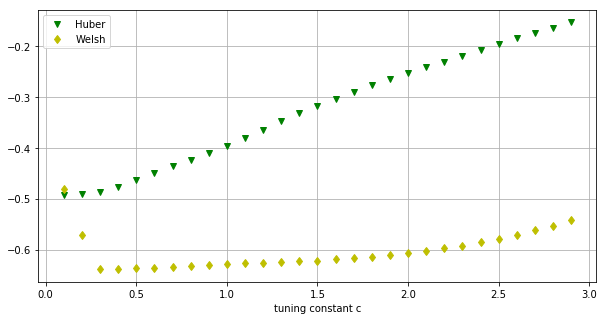

In [114]:
gfun=gfunh
rep=[]
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
for c in np.r_[0.1:3:0.1]:
    x3,y3=x2[:120],y2[:120]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
arech=np.array(rep)
gfun=gfunw
rep=[]
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
for c in np.r_[0.1:3:0.1]:
    x3,y3=x2[:120],y2[:120]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
arecw=np.array(rep)
pl.plot(np.r_[0.1:3:0.1],arech[:,0],'gv')
pl.plot(np.r_[0.1:3:0.1],arecw[:,0],'yd')
pl.xlabel("tuning constant c")
pl.grid()
pl.legend(["Huber","Welsh"],loc=2)

### odhad nejistot pomocí bootstrapu 

co je **bootstrap**: vybereme `bootfr` bodů ze sady dat a nahradíme je nějakými (jinými) z původního vzorku

použitelné tehdy, pokud klasické metody (derivace minim. funkce podle parametru) selhávají

In [50]:
boofr=20
gsel=(len(x)+len(x2))//2
gfun=gfunw
rep=[]
for i in range(1000):
    x3,y3=x2[:gsel],y2[:gsel].copy()
    ifrom=np.random.choice(gsel,boofr)
    ito=np.random.choice(gsel,boofr)
    y3[ito]=y3[ifrom]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
brepw=np.array(rep)
brepw.std(0)

array([0.04381848, 0.2670285 , 8.45792191])

poměr dobrých a vychýlených dat 50:65

In [51]:
gfun=gfunc
rep=[]
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
for i in range(1000):
    x3,y3=x2[:gsel],y2[:gsel].copy()
    ifrom=np.random.choice(gsel,boofr)
    ito=np.random.choice(gsel,boofr)
    y3[ito]=y3[ifrom]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
brepc=np.array(rep)
brepc.std(0)

array([ 0.05484164,  0.35090801, 21.40206349])

In [52]:
gfun=gfunh
rep=[]
wei=lambda p:gfun(y3-p[1]-p[0]*x3).sum()
for i in range(1000):
    x3,y3=x2[:gsel],y2[:gsel].copy()
    ifrom=np.random.choice(gsel,boofr)
    ito=np.random.choice(gsel,boofr)
    y3[ito]=y3[ifrom]
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
breph=np.array(rep)
breph.std(0)

array([ 0.06040849,  0.35997978, 17.86539675])

In [45]:
# definujeme obecnou funkci
def bootme(gfunx, boofr=20,niter=1000,gsel=115):
    rep=[]
    wei=lambda p:gfunx(y3-p[1]-p[0]*x3).sum()
    for i in range(niter):
        x3,y3=x2[:gsel],y2[:gsel].copy()
        ifrom=np.random.choice(gsel,boofr)
        mask=np.ones(gsel,'bool')
        mask[ifrom]=False
        ito=np.random.choice(np.r_[:gsel][mask],boofr)
        y3[ito]=y3[ifrom]
        #gfun=gfunx
        wei=lambda p:gfunx(y3-p[1]-p[0]*x3).sum()
        pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
        rep.append(list(pars)+[wei(pars),y3.std()])
    return np.array(rep)
bootme(gfunh,20,500).std(0)

array([ 0.06044923,  0.35979261, 19.79105909,  0.07671245])

In [64]:
c=2
bootme(gfunw,20,500,115).std(0)

array([0.02552403, 0.16697942, 4.66485374, 0.07776097])

In [46]:
# Welsch
bootme(gfunw,20,500,115).std(0)

array([0.04109321, 0.251992  , 9.20919697, 0.08021824])

In [47]:
#zamenujeme 2x tolik bodu
bootme(gfunw,40,500,115).std(0)

array([ 0.07590273,  0.39715915, 11.4431551 ,  0.10848691])

zavisí na různých parametrech - bootstrap slouží jako **relativní hodnota** pro porovnání metod 

In [62]:
# McClure vychazi nejlepe..
barr=bootme(gfunm,20,500)
barr.std(0),barr.mean(0)

(array([0.01510802, 0.09761547, 1.0233503 , 0.07833261]),
 array([-0.62351861,  3.14792708, 28.86632891,  2.46400267]))

#### úloha z pravděpodobnosti...

In [102]:
#kolik ruznych prvku bude mit nahodny vyber s opakovanim
reprod=np.array([len(set(np.random.randint(gsel,size=gsel))) for i in range(200)])
reprod.mean(),reprod.min(),reprod.max(),reprod.std()

(72.989999999999995, 64, 84, 3.5128193804976653)

### testování v simulaci

numerický experiment místo bootstrapu

In [67]:
gfun=gfunw
x1=x.copy()
c=1
rep=[]
for i in range(500):
    y1=x1*slp+random.normal(3,0.4,size=x.shape)
    x3=np.concatenate([x1,random.uniform(2,10,size=int(gsel-x.size))])
    y3=np.concatenate([y1,random.uniform(y.min()-3,y.max()+3,size=int(gsel-x.size))])
    pars=op.fmin(wei,[eslp,y3.mean()-eslp*x3.mean()],disp=0)
    rep.append(list(pars)+[wei(pars)])
crepw=np.array(rep)
crepw.std(0)

array([0.02983815, 0.18830616, 1.23687689])

In [70]:
rep=[]
for c in np.r_[0.6:3:0.2]:
    barr=bootme(gfunw,20,500,115)
    rep.append(np.r_[barr.std(0),barr.mean(0)])
bootdis=np.array(rep)

In [84]:
#linearni clen
bootdis[:,[4,0]]

array([[-0.63972293,  0.01535566],
       [-0.63491628,  0.01525895],
       [-0.628015  ,  0.01646708],
       [-0.62232537,  0.0173105 ],
       [-0.61320435,  0.01891562],
       [-0.60810887,  0.02047981],
       [-0.59587978,  0.02453   ],
       [-0.58208254,  0.02811258],
       [-0.56515842,  0.03135531],
       [-0.54661209,  0.03475814],
       [-0.52617457,  0.03933812],
       [-0.50113351,  0.04187983]])

In [74]:
#absolutni clen
bootdis[:,[5,1]]

array([[3.26301191, 0.09326071],
       [3.22251292, 0.09388452],
       [3.17045434, 0.10540777],
       [3.1334417 , 0.1155018 ],
       [3.06940554, 0.1229748 ],
       [3.03459368, 0.13286638],
       [2.94444519, 0.15971805],
       [2.85814454, 0.18461468],
       [2.74239158, 0.2012196 ],
       [2.6300811 , 0.22330456],
       [2.51625662, 0.23912331],
       [2.36640377, 0.25927715]])

### nejmenší medián
použije se místo sumy čtverců

nelze minimalizovat analyticky, v praxi pomocí MC

In [38]:
gfun2=lambda x:abs(x)
wei2=lambda p:np.median(gfun2(y2-p[1]-p[0]*x2))
op.fmin(wei2,[-0.5,y.mean()-0.5*x.mean()])

Optimization terminated successfully.
         Current function value: 1.360260
         Iterations: 63
         Function evaluations: 119


array([-0.4084894,  1.8100606])

Vychýlenost (*bias*)
---------------------- 

Odstranění rozdělením vzorku (M rozdělíme na $m_1$ a $m_2$ o velikostech *N*)

$$E(M)=\theta + \frac{1}{2N}\beta + O(1/N^2)$$

$$E(m_{1/2})=\theta + \frac{1}{N}\beta + O(1/N^2)$$

$$2E(M)-\frac{E(m_1)+E(m_2)}{2} = \theta + O(1/N^2)$$

Zvýší se ovšem rozptyl členem řádu $1/N$

#### Jackknife (vynechání měření)  

optimalizovaná varianta, rozptyl naroste jen člen řádu $1/N^2$
(porovnání s metodou [bootstrapu](http://www.jstor.org/stable/10.2307/2958830))

$$\hat \alpha^* = N \hat \alpha - \frac{N-1}{N}\sum \alpha_j,$$
kde $\alpha_j=f(x_1,x_2,..x_{j-1},x_{j+1}...)$ je odhad s vynecháním j-tého vzorku.


Další manipulace se vzorky (robustnost)
--------------

* ořez (trimming) - vynechání $n/2$ nejmenších a největších hodnot

* winsorizace - nahrazení ořezaných hodnot minimem/maximem zbytku 
(kombinace průměru a midrange)

#### Příklad: odhad středu (symetrického) rozdělení 
(location parameter)

posuzuje se asymptotická efektivita (poměr k MVB pro $N \to \infty$) 

pro normálně rozdělená data s rostoucím $n$ efektivita klesá, pro rozdělení s větším vlivem okrajových hodnot (dvojexponenciála, Cauchy) roste

Optimum (*minimax*) pro $r=(N-n)/2N=0.23$   

![class=left asym.efektivita](http://physics.muni.cz/praktika/static/docs/TPX/asym_effectivity.png)

### Ořez
testování ořezaného průměru 

odhady nejistot pomocí bootstrapingu

In [107]:
size=1000
def gendata(gaus=2,extr=10,exran=5,exshi=1):
    data=random.normal(0,2,size)
    if extr>0: data[::extr]+=random.uniform(-exran+exshi,exran+exshi,size//extr) #every extr-th point is an outlier
    return data
data=gendata()
moms=[(data**i).mean() for i in [1,2]]
from numpy import sqrt
vari=moms[1]-moms[0]**2
[sum((data-moms[0])**2>i**2*vari) for i in [1,2,3]]

[318, 44, 4]

In [108]:
def bootest(nite=200,nsig=2,ntrim=0,extr=10,exran=10):
    '''vraci prumer a smerod. odchylku z 
        - prumeru
        - orezaneho prumeru na nsig nasobek smerod. odchylky
    '''
    rep=[]
    for j in range(nite):
        bootstr=gendata(extr=10,exran=exran)[random.randint(0,size,size)] #
        moms=[bootstr.mean(),(bootstr**2).mean()] # vypocet momentu
        vari=moms[1]-moms[0]**2 #odhad rozptylu (vychyleny?)
        orez=bootstr[(bootstr-moms[0])**2<nsig**2*vari].mean()
        if ntrim>0:
            mtrim=np.sort(bootstr)[ntrim:-ntrim].mean()
            rep.append([moms[0],orez,mtrim])
        else:
            rep.append([moms[0],orez])
    arep=r_[rep]
    return arep.mean(0),arep.std(0)
bootest(ntrim=100)

(array([0.0986538 , 0.01518959, 0.03715531]),
 array([0.12421346, 0.10446847, 0.10343885]))

In [109]:
# pro 2 sigma  a 10% orez
zoo=np.array([bootest(ntrim=100) for i in range(200)])

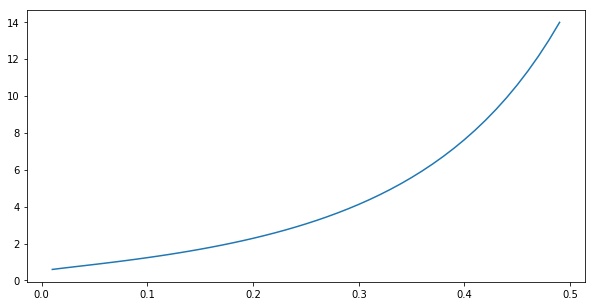

In [85]:
#dual exponent - trimming efficiency
q=np.r_[0.01:0.5:0.01]
D=2-(2-2*np.log(q)+np.log(q)**2)*q
pl.plot(q,1/D)

In [110]:
abs(zoo).mean(0)

array([[0.10020933, 0.0115809 , 0.0368371 ],
       [0.12063685, 0.10278526, 0.10299998]])

(array([ 34.,  26.,  38.,  28.,  23.,  20.,  10.,   8.,   9.,   2.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.        ,  0.00157895,  0.00315789,  0.00473684,  0.00631579,
         0.00789474,  0.00947368,  0.01105263,  0.01263158,  0.01421053,
         0.01578947,  0.01736842,  0.01894737,  0.02052632,  0.02210526,
         0.02368421,  0.02526316,  0.02684211,  0.02842105,  0.03      ]),
 <a list of 19 Patch objects>)

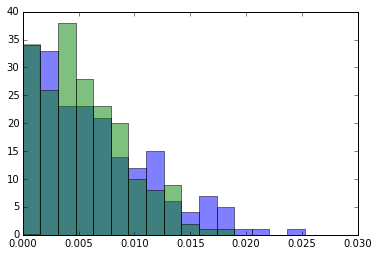

In [34]:
pl.hist(abs(zoo[:,0,0]),r_[:0.03:20j],alpha=.5)
pl.hist(abs(zoo[:,0,1]),r_[:0.03:20j],alpha=.5)

In [37]:
# porovnani bez vychylenych bodu (extr=0)
zoo2=r_[[bootest(extr=0) for i in range(200)]]
abs(zoo2).mean(0)

array([[ 0.00790551,  0.00637971],
       [ 0.11957548,  0.1024984 ]])

In [111]:
zoo3=np.array([bootest(nsig=1,ntrim=200) for i in range(200)])

In [112]:
# pro 1 sigma  a 20% orez
zoo3.mean(0)

array([[0.10022503, 0.05338531, 0.03129469],
       [0.12063947, 0.11512605, 0.10463471]])